# SCIPY Calcul scientifique Optimize, Fourier, Ndimage ... 
https://docs.scipy.org/doc/scipy/reference/

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### interpolate
permet d ajouter des valeur vide en interp0oklant celles ci

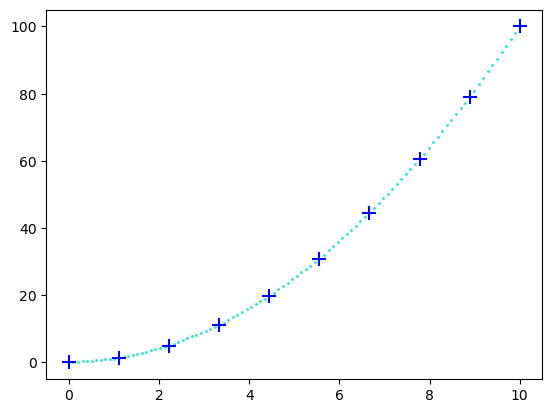

In [3]:
from scipy import interpolate

x1 = np.linspace(0, 10, 10)
y1 = x1**2

f1 = interpolate.interp1d(x1, y1, kind='linear')
x1_ = np.linspace(0, 10, 100)
y1_ = f1(x1_)

plt.scatter(x1_, y1_, c='turquoise', s=5, marker='.')
plt.scatter(x1, y1, c='blue', marker='+', s=100)
plt.show()

### Optimize

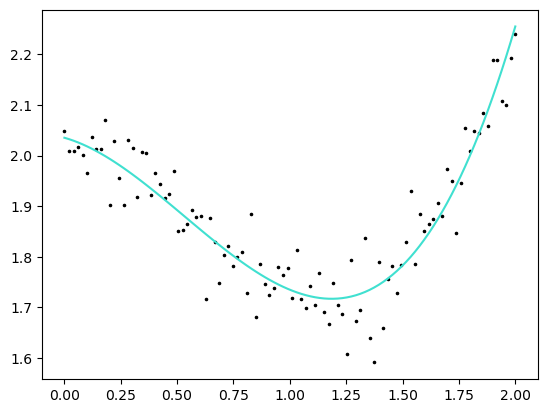

In [4]:
from scipy import optimize

# creation de donnee avec bruit
x2 = np.linspace(0, 2, 100)
y2 = 1/3*x2**3 - 3/5 * x2**2 + 2 + np.random.randn(x2.shape[0])/20

# definition d une fonction polynomiale de degré 3
def f2(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# ajustement de la courbe avec la fonction polynomiale
params, params_covariance = optimize.curve_fit(f2, x2, y2)

plt.scatter(x2, y2, s=10, marker='.', c='black')
plt.plot(x2, f2(x2, params[0], params[1], params[2], params[3]), c='turquoise')


plt.show()

### Minimise

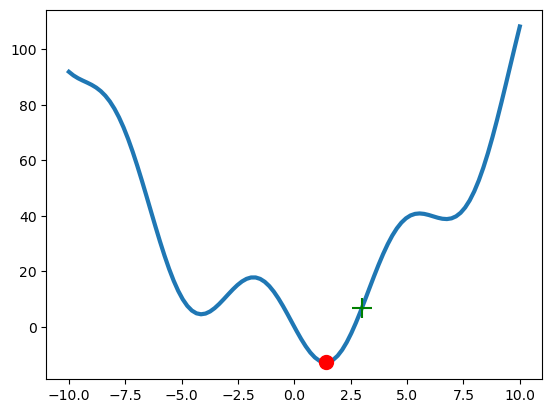

In [5]:
def f3(x):
    return x**2 - 15*np.sin(x)

x3 = np.linspace(-10, 10, 100)

x3_0 = 3
min3 = optimize.minimize(f3, x0=x3_0).x

plt.plot(x3, f3(x3), lw=3, zorder=-1)
plt.scatter(min3, f3(min3), c='r', s=100, zorder=1)
plt.scatter(x3_0, f3(x3_0), c='g', s=200, zorder=1, marker='+')
plt.show()

### Traitement du signal / Signal processing / FFT Fourrier 

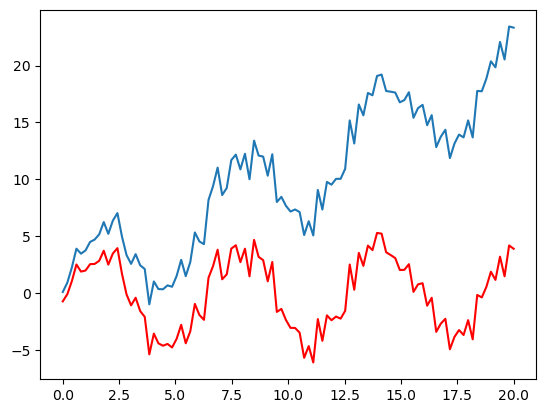

In [ ]:
from scipy import signal

x4 = np.linspace(0, 20, 100)
y4 = x4 + 4*np.sin(x4) + np.random.randn(x4.shape[0])

# elimination de la tendance lineaire
y4_ = signal.detrend(y4)

plt.plot(x4, y4)
plt.plot(x4, y4_, c='r')
plt.show()

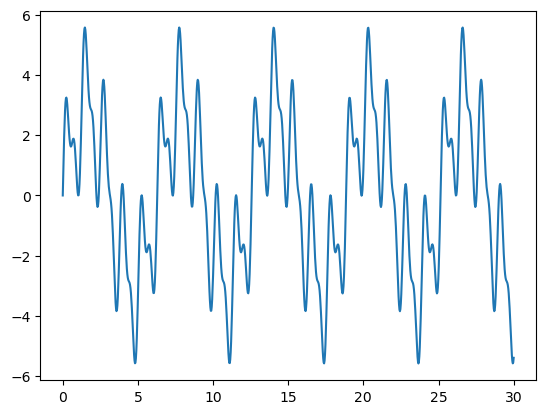

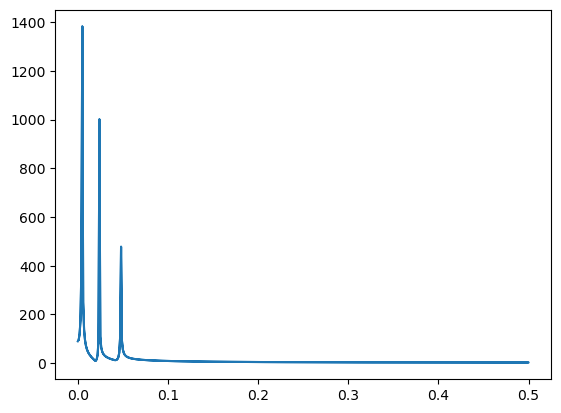

In [11]:
from scipy import fftpack

x5 = np.linspace(0, 30, 1000)
y5 = 3*np.sin(x5) + 2*np.sin(5*x5) + np.sin(10*x5)

plt.plot(x5, y5)
plt.show()

fourier = fftpack.fft(y5)
frequence = fftpack.fftfreq(y5.size)

plt.plot(np.abs(frequence), np.abs(fourier))
plt.show()

/opt/anaconda3/envs/python42/lib/python3.10/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/envs/python42/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


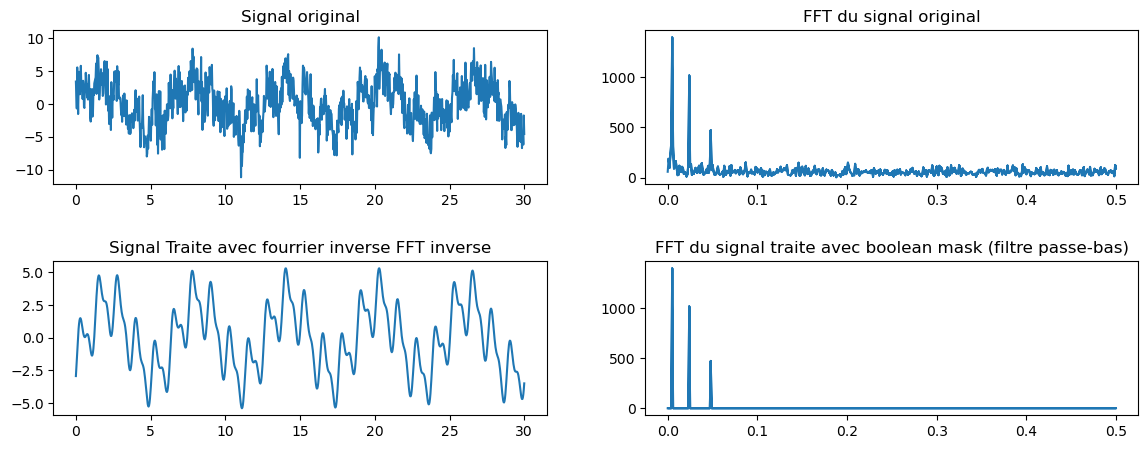

In [42]:
from scipy import fftpack

x6 = np.linspace(0, 30, 1000)
y6 = 3*np.sin(x6) + 2*np.sin(5*x6) + np.sin(10*x6) + np.random.randn(x6.shape[0])*2

plt.figure(figsize=(14, 5))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 1)
plt.title('Signal original')
plt.plot(x6, y6)

plt.subplot(2, 2, 2)
plt.title('FFT du signal original')
fourier = fftpack.fft(y6)
power = np.abs(fourier)
frequence = fftpack.fftfreq(y6.size)
plt.plot(np.abs(frequence), power)

plt.subplot(2, 2, 4)
plt.title('FFT du signal traite avec boolean mask (filtre passe-bas)')
fourier[power < 400] = 0
plt.plot(np.abs(frequence), np.abs(fourier))

plt.subplot(2, 2, 3)
plt.title('Signal Traite avec fourrier inverse FFT inverse')
filtered_y6 = fftpack.ifft(fourier)
plt.plot(x6, filtered_y6)

plt.show()

### Traitement image

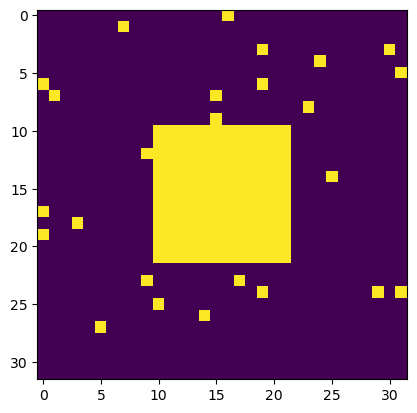

In [45]:
from scipy import ndimage

np.random.seed(0)
x7 = np.zeros((32, 32))
x7[10:-10, 10:-10] = 1
x7[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1

plt.imshow(x7)
plt.show()

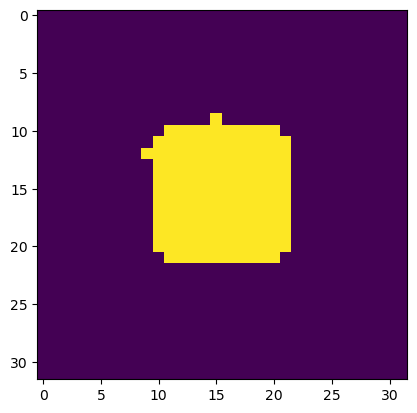

In [48]:
# ouverture : supprime les petits objets
open_x = ndimage.binary_opening(x7)
plt.imshow(open_x)
plt.show()